In [1]:
#alpaca import 

#login
from alpaca.trading.client import TradingClient

#market order
from alpaca.trading.requests import MarketOrderRequest
from alpaca.trading.enums import OrderSide, TimeInForce

#assets req
from alpaca.trading.requests import GetAssetsRequest
from alpaca.trading.enums import AssetClass

#getting historical data
from alpaca.data import CryptoHistoricalDataClient, StockHistoricalDataClient

#creating request
from alpaca.data.requests import StockLatestQuoteRequest

#historical data
from alpaca.data.requests import CryptoBarsRequest
from alpaca.data.timeframe import TimeFrame
from datetime import datetime, timedelta

#data stream or websokets
from alpaca.data.live import CryptoDataStream, StockDataStream

#data analysis import
import pandas as pd
import numpy as np
import time 


In [2]:
key = 'PKZM8S2GMAAJB0AGGNUS'
secret = '9XzqSy9XwtEvwFj6oMK3v5fDHDkSyWDlDIUbTWU0'

# paper=True enables paper trading
trading_client = TradingClient(key,secret, paper=True)

In [3]:
#getting account details 
account = trading_client.get_account()
account

{   'account_blocked': False,
    'account_number': 'PA3M7JKJFYJF',
    'accrued_fees': '0',
    'buying_power': '197987.64',
    'cash': '98973.71',
    'created_at': datetime.datetime(2023, 12, 5, 18, 1, 50, 812575, tzinfo=TzInfo(UTC)),
    'crypto_status': <AccountStatus.ACTIVE: 'ACTIVE'>,
    'currency': 'USD',
    'daytrade_count': 1,
    'daytrading_buying_power': '0',
    'equity': '99977.93',
    'id': UUID('801b0c3f-4b5a-47ee-bb44-148c6676a41a'),
    'initial_margin': '20.11',
    'last_equity': '100000.39',
    'last_maintenance_margin': '0',
    'long_market_value': '1004.22',
    'maintenance_margin': '12.06',
    'multiplier': '2',
    'non_marginable_buying_power': '98973.71',
    'pattern_day_trader': False,
    'pending_transfer_in': '0',
    'pending_transfer_out': None,
    'portfolio_value': '99977.93',
    'regt_buying_power': '197987.64',
    'short_market_value': '0',
    'shorting_enabled': True,
    'sma': '100000',
    'status': <AccountStatus.ACTIVE: 'ACTIVE'>

In [4]:

# search for crypto assets
search_params = GetAssetsRequest(asset_class=AssetClass.CRYPTO)

#get account assets details
assets = trading_client.get_all_assets(search_params)
assets

[{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
     'attributes': [],
     'easy_to_borrow': False,
     'exchange': <AssetExchange.CRYPTO: 'CRYPTO'>,
     'fractionable': True,
     'id': UUID('c150e086-1e75-44e6-9c2c-093bb1e93139'),
     'maintenance_margin_requirement': 100.0,
     'marginable': False,
     'min_order_size': 2.3955e-05,
     'min_trade_increment': 1e-09,
     'name': 'Bitcoin / USD Tether',
     'price_increment': 1.0,
     'shortable': False,
     'status': <AssetStatus.ACTIVE: 'active'>,
     'symbol': 'BTC/USDT',
     'tradable': True},
 {   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
     'attributes': [],
     'easy_to_borrow': False,
     'exchange': <AssetExchange.CRYPTO: 'CRYPTO'>,
     'fractionable': True,
     'id': UUID('0425de77-90d3-4ac9-b914-73423b4e42b8'),
     'maintenance_margin_requirement': 100.0,
     'marginable': False,
     'min_order_size': 1.605755026,
     'min_trade_increment': 1e-09,
     'name': 'Curve / US Dollar',
     'price_in

In [21]:

# preparing orders
market_order_data = MarketOrderRequest(
                    symbol="BTC/USD",
                    qty=trading_client.get_open_position('BTCUSD').qty,
                    side=OrderSide.SELL,
                    time_in_force=TimeInForce.GTC
                    )

# Market order
market_order = trading_client.submit_order(
                order_data=market_order_data
               )
market_order

{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
    'asset_id': UUID('276e2673-764b-4ab6-a611-caf665ca6340'),
    'canceled_at': None,
    'client_order_id': 'a1acdc34-604c-4dde-8908-4f8c5b924908',
    'created_at': datetime.datetime(2023, 12, 13, 11, 28, 21, 599293, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('790c8c93-d232-4361-a1db-1b9b3b5f7b72'),
    'legs': None,
    'limit_price': None,
    'notional': None,
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': '0.0249375',
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.SELL: 'sell'>,
    'status': <OrderStatus.PENDING_NEW: 'pending_new'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2023, 12, 13, 11, 28, 21, 598130, tzinfo=TzInfo(UTC)),
    'symbol': 

In [7]:
market_order

{   'asset_class': <AssetClass.CRYPTO: 'crypto'>,
    'asset_id': UUID('276e2673-764b-4ab6-a611-caf665ca6340'),
    'canceled_at': None,
    'client_order_id': 'e8fa925a-f3e3-4a48-a3df-a508dd3ba3b1',
    'created_at': datetime.datetime(2023, 12, 13, 8, 11, 21, 986555, tzinfo=TzInfo(UTC)),
    'expired_at': None,
    'extended_hours': False,
    'failed_at': None,
    'filled_at': None,
    'filled_avg_price': None,
    'filled_qty': '0',
    'hwm': None,
    'id': UUID('9ba8f2e4-a99d-4c82-b506-311d6a367016'),
    'legs': None,
    'limit_price': None,
    'notional': '400',
    'order_class': <OrderClass.SIMPLE: 'simple'>,
    'order_type': <OrderType.MARKET: 'market'>,
    'qty': None,
    'replaced_at': None,
    'replaced_by': None,
    'replaces': None,
    'side': <OrderSide.BUY: 'buy'>,
    'status': <OrderStatus.PENDING_NEW: 'pending_new'>,
    'stop_price': None,
    'submitted_at': datetime.datetime(2023, 12, 13, 8, 11, 21, 985303, tzinfo=TzInfo(UTC)),
    'symbol': 'BTC/USD',

In [20]:

# Get our position in AAPL.
aapl_position = trading_client.get_open_position('BTCUSD')

# Get a list of all of our positions.
portfolio = trading_client.get_all_positions()

for x in portfolio:
    print(x)

print(aapl_position.qty)


asset_id=UUID('64bbff51-59d6-4b3c-9351-13ad85e3c752') symbol='BTCUSD' exchange=<AssetExchange.CRYPTO: 'CRYPTO'> asset_class=<AssetClass.CRYPTO: 'crypto'> asset_marginable=False avg_entry_price='41222.7' qty='0.0249375' side=<PositionSide.LONG: 'long'> market_value='1025.3502' cost_basis='1027.99108125' unrealized_pl='-2.64088125' unrealized_plpc='-0.00256897292026' unrealized_intraday_pl='-2.64088125' unrealized_intraday_plpc='-0.00256897292026' current_price='41116.8' lastday_price='40944.15' change_today='0.0042167196046322' swap_rate=None avg_entry_swap_rate=None usd=None qty_available='0.0249375'
asset_id=UUID('b28f4066-5c6d-479b-a2af-85dc1a8f16fb') symbol='SPY' exchange=<AssetExchange.ARCA: 'ARCA'> asset_class=<AssetClass.US_EQUITY: 'us_equity'> asset_marginable=True avg_entry_price='461.61' qty='0.086653235' side=<PositionSide.LONG: 'long'> market_value='40.27902322505' cost_basis='39.999999808' unrealized_pl='0.27902341705' unrealized_plpc='0.0069755854597328' unrealized_intrada

In [ ]:
# Print the quantity of shares for each position.
for position in portfolio:
    print("{} shares of {}".format(position.qty, position.symbol))

In [5]:

# no keys required(optional ).
crypto_client = CryptoHistoricalDataClient(key,secret)
stock_clinet = StockHistoricalDataClient(key,secret)



In [13]:
# multi symbol request - single symbol is similar
multisymbol_request_params = StockLatestQuoteRequest(symbol_or_symbols=["SPY", "GLD", "TLT"])

latest_multisymbol_quotes = stock_clinet.get_stock_latest_quote(multisymbol_request_params)

gld_latest_ask_price = latest_multisymbol_quotes["GLD"].ask_price

In [14]:
latest_multisymbol_quotes

{'TLT': {   'ask_exchange': 'V',
     'ask_price': 94.27,
     'ask_size': 13.0,
     'bid_exchange': 'V',
     'bid_price': 94.21,
     'bid_size': 13.0,
     'conditions': ['R'],
     'symbol': 'TLT',
     'tape': 'C',
     'timestamp': datetime.datetime(2023, 12, 11, 21, 19, 56, 623352, tzinfo=TzInfo(UTC))},
 'GLD': {   'ask_exchange': 'V',
     'ask_price': 187.35,
     'ask_size': 5.0,
     'bid_exchange': 'V',
     'bid_price': 179.92,
     'bid_size': 5.0,
     'conditions': ['R'],
     'symbol': 'GLD',
     'tape': 'B',
     'timestamp': datetime.datetime(2023, 12, 11, 21, 59, 55, 28270, tzinfo=TzInfo(UTC))},
 'SPY': {   'ask_exchange': 'V',
     'ask_price': 464.9,
     'ask_size': 10.0,
     'bid_exchange': 'V',
     'bid_price': 459.05,
     'bid_size': 10.0,
     'conditions': ['R'],
     'symbol': 'SPY',
     'tape': 'B',
     'timestamp': datetime.datetime(2023, 12, 11, 21, 59, 55, 24670, tzinfo=TzInfo(UTC))}}

In [ ]:


request_params = CryptoBarsRequest(
                        symbol_or_symbols=["BTC/USD", "ETH/USD"],
                        timeframe=TimeFrame.Minute,
                        start=datetime(2022, 7, 1),
                        end=datetime(2023, 9, 1)
                 )

bars = crypto_client.get_crypto_bars(request_params)

# convert to dataframe
bars.df

# access bars as list - important to note that you must access by symbol key
# even for a single symbol request - models are agnostic to number of symbols
pd.DataFrame(bars["BTC/USD"])

In [7]:

#User Details
crypto_or_stock = 'crypto' #Enter only crypto or stock
instrument= 'BTC/USD'    #stock code example = 'SPY'  | #crypto code example = 'BTC/USD'    
old_data_candle = TimeFrame.Minute #put dot to see other option
start_date = datetime.now()-timedelta(hours=8)
end_date = datetime.now()


#craeting request param
request_params = CryptoBarsRequest(
                        symbol_or_symbols=[instrument],
                        timeframe=old_data_candle,
                        start=start_date,
                        end=end_date
                 )

bars = crypto_client.get_crypto_bars(request_params)
df = bars.df

# convert to dataframe
#price =list(bars.df['close'])

In [17]:
#df.index
#('BTC/USD', '2023-12-12 08:49:00+00:00')


df['timestamp'] = [datetime.fromtimestamp(x[1].timestamp())-timedelta(hours=5.5) for x in df.index]
#print(df.index[0][1].minute%5==0)
#print(df.index[0][1].timestamp())
df

open        high         low  \
symbol  timestamp                                                       
BTC/USD 2023-12-12 17:03:00+00:00  41220.5180  41220.5180  41220.5180   
        2023-12-12 17:04:00+00:00  41235.7000  41235.7000  41235.7000   
        2023-12-12 17:05:00+00:00  41217.5000  41247.0500  41217.5000   
        2023-12-12 17:06:00+00:00  41232.9565  41232.9565  41220.1200   
        2023-12-12 17:07:00+00:00  41207.6650  41207.6650  41207.6650   
...                                       ...         ...         ...   
        2023-12-12 19:25:00+00:00  41062.5650  41062.5650  41062.5650   
        2023-12-12 19:27:00+00:00  41049.1960  41049.1960  41049.1960   
        2023-12-12 19:28:00+00:00  40998.7500  40998.7500  40998.7500   
        2023-12-12 19:29:00+00:00  41019.0015  41019.0015  41019.0015   
        2023-12-12 19:30:00+00:00  41021.3785  41023.7650  41021.3785   

                                        close  volume  trade_count  vwap  \
symbol  timestamp                                                          
BTC/USD 2023-12-12 17:03:00+00:00  41220.5180     0.0          0.0   0.0   
        2023-12-12 17:04:00+00:00  41235.7000     0.0          0.0   0.0   
        2023-12-12 17:05:00+00:00  41247.0500     0.0          0.0   0.0   
        2023-12-12 17:06:00+00:00  41220.1200     0.0          0.0   0.0   
        2023-12-12 17:07:00+00:00  41207.6650     0.0          0.0   0.0   
...                                       ...     ...          ...   ...   
        2023-12-12 19:25:00+00:00  41062.5650     0.0          0.0   0.0   
        2023-12-12 19:27:00+00:00  41049.1960     0.0          0.0   0.0   
        2023-12-12 19:28:00+00:00  40998.7500     0.0          0.0   0.0   
        2023-12-12 19:29:00+00:00  41019.0015     0.0          0.0   0.0   
        2023-12-12 19:30:00+00:00  41023.7650     0.0          0.0   0.0   

                                            timestamp  
symbol  timestamp                                      
BTC/USD 2023-12-12 17:03:00+00:00 2023-12-12 17:03:00  
        2023-12-12 17:04:00+00:00 2023-12-12 17:04:00  
        2023-12-12 17:05:00+00:00 2023-12-12 17:05:00  
        2023-12-12 17:06:00+00:00 2023-12-12 17:06:00  
        2023-12-12 17:07:00+00:00 2023-12-12 17:07:00  
...                                               ...  
        2023-12-12 19:25:00+00:00 2023-12-12 19:25:00  
        2023-12-12 19:27:00+00:00 2023-12-12 19:27:00  
        2023-12-12 19:28:00+00:00 2023-12-12 19:28:00  
        2023-12-12 19:29:00+00:00 2023-12-12 19:29:00  
        2023-12-12 19:30:00+00:00 2023-12-12 19:30:00  

[116 rows x 8 columns]

In [26]:

# Function to insert row in the dataframe
def Insert_row_(row_number, df, row_value):
    # Slice the upper half of the dataframe
    df1 = df[0:row_number]
  
    # Store the result of lower half of the dataframe
    df2 = df[row_number:]
  
    # Insert the row in the upper half dataframe
    df1.loc[row_number]=row_value
  
    # Concat the two dataframes
    df_result = pd.concat([df1, df2])
  
    # Reassign the index labels
    #df_result.index = [*range(df_result.shape[0])]
  
    # Return the updated dataframe
    return df_result


start = df['timestamp'][0].timestamp()
end = df['timestamp'][-1].timestamp()
last_index = 0
print(start,end)
df['timestamp']

'''for x in range(int(start),int(end),60):
    t = datetime.fromtimestamp(x)-timedelta(hours=5.5)
    print(x,t)
    if t in df['timestamp']:
        last_index = x
        print(t,'yes')
    else:
        print(t,'no')'''
        

1702400580.0 1702409400.0


C:\Users\Ankit\AppData\Local\Temp\ipykernel_21252\1415809964.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = df['timestamp'][0].timestamp()
C:\Users\Ankit\AppData\Local\Temp\ipykernel_21252\1415809964.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end = df['timestamp'][-1].timestamp()


"for x in range(int(start),int(end),60):\n    t = datetime.fromtimestamp(x)-timedelta(hours=5.5)\n    print(x,t)\n    if t in df['timestamp']:\n        last_index = x\n        print(t,'yes')\n    else:\n        print(t,'no')"

In [99]:
df

,open,high,low,close,volume,trade_count,vwap
0,41996.7330,42012.0865,41996.7330,42005.5700,0.000003,1.0,41996.733
1,41988.1400,41997.2350,41979.0000,41979.0000,0.000012,1.0,41988.140
2,41989.5605,41989.5605,41989.5605,41989.5605,0.000000,0.0,0.000
3,41958.3560,41958.3560,41958.3560,41958.3560,0.000000,0.0,0.000
4,41981.1150,41992.0430,41975.2230,41991.0405,0.000000,0.0,0.000
...,...,...,...,...,...,...,...
142,76.0000,76.0000,76.0000,76.0000,76.000000,76.0,76.000
143,76.0000,76.0000,76.0000,76.0000,76.000000,76.0,76.000
144,76.0000,76.0000,76.0000,76.0000,76.000000,76.0,76.000
145,76.0000,76.0000,76.0000,76.0000,76.000000,76.0,76.000


In [41]:
#creating stream clients

# keys are required for live data
crypto_stream = CryptoDataStream(key, secret)

# keys required
stock_stream = StockDataStream(key, secret)

In [48]:

# async handler
async def quote_data_handler(data):
    # quote data will arrive here
    print(data)

stock_stream.subscribe_quotes(quote_data_handler, "SPY")

await crypto_stream.run()

TypeError: object function can't be used in 'await' expression

In [71]:
import time
import logging
import random
#logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.DEBUG)
data = [random.randint(500,700) for x in range(50)]
print(data)

price = []
start_time = time.time()
interval = 1
hold = False
for i in range(50):
    
    buy_price = 0
    sell_price = 0
    time.sleep(1)
    print(f'Price - {data[i]}')
    price.append(data[i])

    avg7 = float(pd.DataFrame(price).ewm(span = 7).mean().iloc[-1].iloc[0])
    avg21 = float(pd.DataFrame(price).ewm(span = 21).mean().iloc[-1].iloc[0])
    print(f'avg7 - {avg7} | avg21 - {avg21}')
    if all((hold == False, avg7>avg21,len(price)>21)):
        print(f'buy at price{data[i]}')
        hold = True
        buy_price = i
    if all((hold == True , avg7<avg21,len(price)>21)):
        print(f'sell at {data[i]}')
        hold=False
        sell_price = i
        print(f'profit of {buy_price-sell_price}')





[669, 614, 638, 619, 628, 647, 653, 623, 628, 583, 646, 511, 669, 608, 647, 688, 529, 605, 577, 610, 603, 597, 573, 530, 634, 581, 578, 604, 623, 502, 555, 580, 583, 621, 615, 609, 577, 571, 541, 695, 555, 546, 546, 678, 541, 647, 507, 588, 606, 633]
Price - 669
avg7 - 669.0 | avg21 - 669.0
Price - 614
avg7 - 637.5714285714286 | avg21 - 640.190476190476
Price - 638
avg7 - 637.7567567567568 | avg21 - 639.3897280966767
Price - 619
avg7 - 630.8971428571429 | avg21 - 633.5421245421245
Price - 628
avg7 - 629.9475032010243 | avg21 - 632.2130350035216
Price - 647
avg7 - 635.1336501336501 | avg21 - 635.2995770911177
Price - 653
avg7 - 640.2883003451433 | avg21 - 638.6048172843094
Price - 623
avg7 - 635.4853921153031 | avg21 - 635.9456994249532
Price - 628
avg7 - 633.4621279298526 | avg21 - 634.6914307599791
Price - 583
avg7 - 620.0937771278601 | avg21 - 627.0436650226384
Price - 646
avg7 - 626.8559334375032 | avg21 - 629.6969167448071
Price - 511
avg7 - 596.9444638375209 | avg21 - 613.86023220

In [105]:
df

open        high         low  \
symbol  timestamp                                                       
BTC/USD 2023-12-12 12:01:00+00:00  41599.9150  41599.9150  41599.9150   
        2023-12-12 12:10:00+00:00  41640.8925  41640.8925  41640.8925   
        2023-12-12 12:12:00+00:00  41646.8550  41646.8550  41646.8550   
        2023-12-12 12:13:00+00:00  41665.2240  41665.2240  41661.7270   
        2023-12-12 12:15:00+00:00  41741.9880  41741.9880  41738.8550   
...                                       ...         ...         ...   
        2023-12-12 14:21:00+00:00  41718.4185  41718.4185  41715.8095   
        2023-12-12 14:22:00+00:00  41700.6365  41700.6365  41700.6365   
        2023-12-12 14:23:00+00:00  41719.1500  41719.1500  41719.1500   
        2023-12-12 14:27:00+00:00  41770.2000  41770.2000  41770.2000   
        2023-12-12 14:28:00+00:00  41743.4050  41743.4050  41743.4050   

                                        close    volume  trade_count  \
symbol  timestamp                                                      
BTC/USD 2023-12-12 12:01:00+00:00  41599.9150  0.000000          0.0   
        2023-12-12 12:10:00+00:00  41640.8925  0.000000          0.0   
        2023-12-12 12:12:00+00:00  41646.8550  0.000000          0.0   
        2023-12-12 12:13:00+00:00  41661.7270  0.000000          0.0   
        2023-12-12 12:15:00+00:00  41738.8550  0.002331          1.0   
...                                       ...       ...          ...   
        2023-12-12 14:21:00+00:00  41715.8095  0.000000          0.0   
        2023-12-12 14:22:00+00:00  41700.6365  0.000000          0.0   
        2023-12-12 14:23:00+00:00  41719.1500  0.000000          0.0   
        2023-12-12 14:27:00+00:00  41770.2000  0.000000          0.0   
        2023-12-12 14:28:00+00:00  41743.4050  0.000000          0.0   

                                        vwap                 timestamp  
symbol  timestamp                                                       
BTC/USD 2023-12-12 12:01:00+00:00      0.000 2023-12-12 12:01:00+00:00  
        2023-12-12 12:10:00+00:00      0.000 2023-12-12 12:10:00+00:00  
        2023-12-12 12:12:00+00:00      0.000 2023-12-12 12:12:00+00:00  
        2023-12-12 12:13:00+00:00      0.000 2023-12-12 12:13:00+00:00  
        2023-12-12 12:15:00+00:00  41741.988 2023-12-12 12:15:00+00:00  
...                                      ...                       ...  
        2023-12-12 14:21:00+00:00      0.000 2023-12-12 14:21:00+00:00  
        2023-12-12 14:22:00+00:00      0.000 2023-12-12 14:22:00+00:00  
        2023-12-12 14:23:00+00:00      0.000 2023-12-12 14:23:00+00:00  
        2023-12-12 14:27:00+00:00      0.000 2023-12-12 14:27:00+00:00  
        2023-12-12 14:28:00+00:00      0.000 2023-12-12 14:28:00+00:00  

[91 rows x 8 columns]

In [5]:
import random 
data = [random.randint(500,700) for x in range(50)]

In [8]:
import pandas as pd 


In [15]:
df = pd.DataFrame(data, columns=['data'])

In [29]:
df['7DayEMA'] = df['data'].ewm(span = 7,adjust = False).mean()
df['21DayEMA'] = df['data'].ewm(span = 21,adjust = False).mean()

In [42]:
df1 = df.iloc[22:]

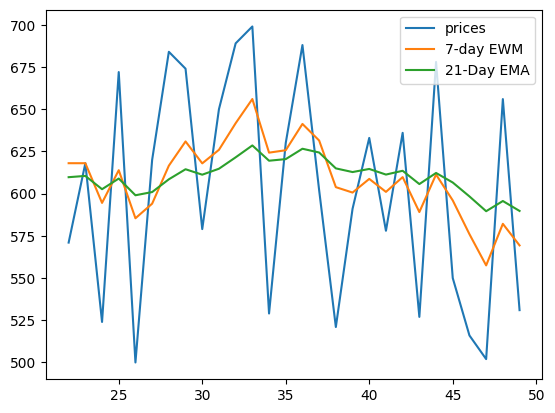

In [44]:
import matplotlib.pyplot as plt

#plot sales and 4-day exponentially weighted moving average 
plt.plot(df1['data'], label='prices')
plt.plot(df1['7DayEMA'], label='7-day EWM')
plt.plot(df1['21DayEMA'],label = '21-Day EMA')

#add legend to plot
plt.legend(loc=1)

In [54]:
df2 = pd.DataFrame(data)

In [69]:
float(df2.ewm(span=7,min_periods=3).mean().iloc[-1].iloc[0])

569.3394927349569